In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install wikipedia
! pip install nltk
! pip install rake-nltk

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=0e69579437cf98a35a74f464b55a9dbce1ea2bf313effdf93c0253f75f8bb0a3
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia
  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7829 sha256=6332b67f289f418546718e0f1f4045a8cc2bdd1b0805f108a579f73763e5db17
  Stored in directory: /root/.cache/pip/wheels/7c/d9/8a/b8a9244fa89a07f288f9fe006aafc79d93fceb58496c29b606
Successfully built rake-nltk


In [3]:
! pip install transformers

     |████████████████████████████████| 2.6 MB 5.1 MB/s 
     |████████████████████████████████| 636 kB 47.5 MB/s 
     |████████████████████████████████| 3.3 MB 49.2 MB/s 
     |████████████████████████████████| 895 kB 63.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
import wikipedia
import random
import tqdm
import nltk
import re
import string
import threading
import multiprocessing
import os
import shutil
from nltk.corpus import stopwords
import pandas as pd
import torch
import matplotlib.pyplot as plt


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
stopWordsRu = set(stopwords.words("russian")) 

In [8]:
from transformers import AutoTokenizer, AutoModel
  
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
bert = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")

embeddings = {token: bert.get_input_embeddings()(torch.tensor(id)).detach().numpy()  for token, id in tokenizer.get_vocab().items()}

In [9]:
from tqdm import tqdm

In [10]:
def get_theme(theme: str):
  with open('/content/drive/MyDrive/aiijc_sber/' + theme + '_texts.txt') as f:
    texts = []
    for i in f.readlines():
      if len(i.strip()):
        texts.append(i.strip().replace("=", ''))
  return texts

In [11]:
animal_texts = get_theme("animals")
sport_texts = get_theme("sport")
literature_texts = get_theme("literature")
music_texts = get_theme("music")

In [12]:
data = pd.DataFrame()
data['text'] = animal_texts + sport_texts + literature_texts + music_texts
data['y'] = [0] * len(animal_texts) + [1] * len(sport_texts) + [2] * len(literature_texts) + [3] * len(music_texts)

In [13]:
!pip install pymorphy2[fast]

     |████████████████████████████████| 55 kB 1.9 MB/s 
     |████████████████████████████████| 8.2 MB 6.8 MB/s 
     |████████████████████████████████| 371 kB 29.1 MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp37-cp37m-linux_x86_64.whl size=861258 sha256=3843c6ce066623df7d1d71ba913e490b9d468e4b47f36888b8c6a15f2fcc6e99
  Stored in directory: /root/.cache/pip/wheels/85/51/a4/2de41ff197786537075027c27b479a38da92f50abc86634445
Successfully built DAWG


In [14]:
import pymorphy2
from typing import List
from gensim.models import KeyedVectors
morph = pymorphy2.MorphAnalyzer()
tokenizer = nltk.WordPunctTokenizer()
punctuation = set(string.punctuation + "—")

In [15]:
data.text[0]

'Живо́тные (лат. Animalia) — традиционно (со времён Аристотеля) выделяемая категория организмов, в настоящее время рассматриваемая в качестве биологического царства. Животные являются основным объектом изучения зоологии.'

In [16]:
def text2vec(tokens: List[str], embeddings: KeyedVectors) -> np.ndarray:
    relevant=0
    words_vecs=np.zeros((768,))
    for word in tokens:
        # print(word)
        if (word in embeddings) and (word not in stopWordsRu) and (word.isalpha()) and (word not in punctuation) :
            words_vecs+=embeddings[word]
            relevant+=1

    if relevant:
        words_vecs/=relevant
    return words_vecs

In [17]:
features = []
volume = len(data.text)
counter = 0
for i in data.text:
  counter += 1
  try:
    inda = i.index('—')
    i = i[inda+1:]
  except:
    pass
  i = nltk.word_tokenize(i.lower())
  embs = text2vec(i, embeddings)
  features.append(embs)
  if counter % 1000 == 0:
    print("Done", counter, "from", volume)



Done 1000 from 119850
Done 2000 from 119850
Done 3000 from 119850
Done 4000 from 119850
Done 5000 from 119850
Done 6000 from 119850
Done 7000 from 119850
Done 8000 from 119850
Done 9000 from 119850
Done 10000 from 119850
Done 11000 from 119850
Done 12000 from 119850
Done 13000 from 119850
Done 14000 from 119850
Done 15000 from 119850
Done 16000 from 119850
Done 17000 from 119850
Done 18000 from 119850
Done 19000 from 119850
Done 20000 from 119850
Done 21000 from 119850
Done 22000 from 119850
Done 23000 from 119850
Done 24000 from 119850
Done 25000 from 119850
Done 26000 from 119850
Done 27000 from 119850
Done 28000 from 119850
Done 29000 from 119850
Done 30000 from 119850
Done 31000 from 119850
Done 32000 from 119850
Done 33000 from 119850
Done 34000 from 119850
Done 35000 from 119850
Done 36000 from 119850
Done 37000 from 119850
Done 38000 from 119850
Done 39000 from 119850
Done 40000 from 119850
Done 41000 from 119850
Done 42000 from 119850
Done 43000 from 119850
Done 44000 from 1198

In [18]:
data['features'] = features

In [19]:
import torch
from torch import nn
from torch.nn import functional as F
 
from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [47]:
model = nn.Sequential(
    nn.Linear(768, 1024),
    nn.BatchNorm1d(1024),
    nn.ReLU(),

    nn.Linear(1024, 4)
)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum = 0.9)
criterion = nn.CrossEntropyLoss()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
print(device)

cpu


In [21]:
data.columns

Index(['text', 'y', 'features'], dtype='object')

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(torch.Tensor(data.features), torch.Tensor(data.y), test_size = 0.1, shuffle=True)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

torch.Size([107865, 768]) torch.Size([107865])
torch.Size([11985, 768]) torch.Size([11985])


In [46]:
train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)

BATCH_SIZE = 64
train_dl = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dl = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [25]:
Y_train[:5]

tensor([0., 1., 0., 0., 1.])

In [26]:
class_count = [list(data.y).count(i) for i in range(4)]
print(class_count)
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

[24754, 28428, 36497, 30171]
tensor([4.0398e-05, 3.5177e-05, 2.7400e-05, 3.3144e-05])


In [27]:
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [28]:
def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.title('{}'.format(title))
    plt.plot(train_history, label='train', zorder=1)
    
    points = np.array(val_history)
    steps = list(range(0, len(train_history) + 1, int(len(train_history) / len(val_history))))[1:]
    
    plt.scatter(steps, val_history, marker='+', s=180, c='orange', label='val', zorder=2)
    plt.xlabel('train steps')
    
    plt.legend(loc='best')
    plt.grid()

    plt.show()

In [43]:
def train(model, criterion, optimizer, train_dataloader, test_dataloader, NUM_EPOCH=10):
    train_loss_log = []
    val_loss_log = []
    
    train_acc_log = []
    val_acc_log = []
    
    for epoch in tqdm(range(NUM_EPOCH)):
        model.train()
        train_loss = 0.
        train_size = 0
        
        train_pred = 0.

        for imgs, labels in train_dataloader:
            optimizer.zero_grad()

            y_pred = model.forward(imgs)

            loss = criterion(y_pred, labels.long())
            loss.backward()
            
            train_loss += loss.item()
            train_size += y_pred.size(0)
            train_loss_log.append(loss.data / y_pred.size(0))
            
            train_pred += (y_pred.argmax(1) == labels).sum()

            optimizer.step()
        
        train_acc_log.append(train_pred / train_size)

        val_loss = 0.
        val_size = 0
        
        val_pred = 0.
        
        model.eval()
        
        with torch.no_grad():
            for imgs, labels in test_dataloader:
                
                
                pred = model.forward(imgs)
                loss = criterion(pred, labels.long())
                
                val_loss += loss.item()
                val_size += pred.size(0)
                
                val_pred += (pred.argmax(1) == labels).sum()

        val_loss_log.append(val_loss / val_size)
        val_acc_log.append(val_pred / val_size)

        clear_output()
        plot_history(train_loss_log, val_loss_log, 'loss')

        print('Train loss:', (train_loss / train_size)*100)
        print('Val loss:', (val_loss / val_size)*100)
        print('Train acc:', (train_pred / train_size)*100)
        print('Val acc:', (val_pred / val_size)*100)
        
    return train_loss_log, train_acc_log, val_loss_log, val_acc_log

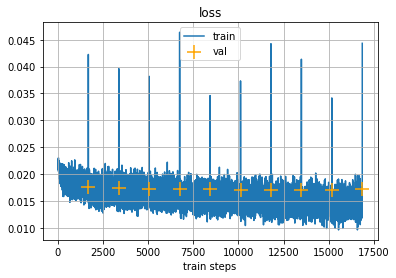


100%|██████████| 10/10 [03:01<00:00, 18.12s/it]

Train loss: 1.447159344102402
Val loss: 1.725806549384189
Train acc: tensor(61.1514)
Val acc: tensor(54.2345)


In [48]:
train_loss_log, train_acc_log, val_loss_log, val_acc_log = train(model, 
                                                                 criterion, 
                                                                 optimizer, 
                                                                 train_dl, 
                                                                 test_dl)

In [31]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_train[:5000])

In [32]:
xs, ys = [], []
for xxx, yyy in X_embedded:
  xs.append(xxx)
  ys.append(yyy)

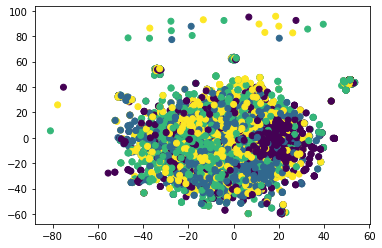

In [33]:
plt.scatter(xs, ys, c=Y_train[:5000])

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
# scaler = preprocessing.QuantileTransformer(random_state=0)
clf = LogisticRegression(random_state=0, max_iter = 1000).fit(X_train, Y_train)
clf.score(X_train, Y_train)

0.528206554489408

In [ ]:
import pandas as pd

In [ ]:
testDf = pd.read_csv('/content/drive/MyDrive/aiijc_sber/test.csv')

In [ ]:
testDf.head(5)

,id,task
0,0,Вопрос 1 Денис готовится провести соревнования...
1,1,Реши задачу.\nСколько коробок корма для собак ...
2,2,"Если групп элементов несколько, то применяется..."
3,3,Вопрос1 ...
4,4,Для наглядной геометрической иллюстрации объём...


In [ ]:
Xtest = tokenizer.texts_to_sequences(map(lambda x: str(x['task']), testDf.iloc))
Xtest = pad_sequences(Xtest, maxlen=sentMaxLen)

In [ ]:
predictions = model.predict(Xtest)
predictions

array([[0.05298402, 0.5866494 , 0.22541152, 0.13495508],
       [0.02405234, 0.8612694 , 0.07303725, 0.04164104],
       [0.07443149, 0.27244335, 0.52692974, 0.12619546],
       ...,
       [0.02555496, 0.8334557 , 0.07907335, 0.06191602],
       [0.07443387, 0.6249237 , 0.19366634, 0.10697617],
       [0.05720105, 0.73691344, 0.12170562, 0.08417981]], dtype=float32)

In [ ]:
predictions = list(map(lambda x: categories[int(x)], np.argmax(predictions, axis=-1)))
predictions[:5]

['музыка', 'музыка', 'спорт', 'музыка', 'музыка']

In [ ]:
from rake_nltk import Rake

def getKeyWords(textSeries: pd.Series, threshold=4, minLen=1, maxLen=2):
    r = Rake(
        stopwords=stopWordsRu,
        punctuations=punctuation,
        min_length=1, max_length=2
    )
    results = []
    for i in range(textSeries.shape[0]):
      r.extract_keywords_from_text(testDf['task'].iloc[i])
      rowResult = r.get_ranked_phrases_with_scores()
      selected = 1
      while selected < len(rowResult):
        if rowResult[selected][0] < threshold:
          break
        selected += 1
      results.append(rowResult[:selected])
    return list(map(lambda task: list(map(lambda keyword: keyword[1], task)), results))

In [ ]:
keyWords = getKeyWords(testDf['task'])

In [ ]:
keyWordsReady = list(map( lambda x: ";".join(x), keyWords))

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/aiijc_sber/sample_submission.csv')


In [ ]:
sample['keywords'] = keyWordsReady

In [ ]:
sample['category'] = predictions

In [ ]:
sample.to_csv('submit.csv', index=False)

In [ ]:
sample['category'].value_counts()

музыка        434
спорт          56
литература     22
животные        2
Name: category, dtype: int64

In [ ]:
sample

,id,category,keywords
0,0,музыка,настольному хоккею;вариантов выбора
1,1,музыка,собак поместится;реши задачу
2,2,спорт,течение года;сдавали зачет;реши задачу;равно и...
3,3,музыка,суммы затрат;продукты питания;конце месяца;дом...
4,4,музыка,этими объектами;увлекающихся футболом;либо пон...
...,...,...,...
509,509,музыка,следующие вопросы;проанализируй диаграмму
510,510,музыка,сборке тренажеров;выполнить задание;6 дней;4 д...
511,511,музыка,7 дней;1 день
512,512,музыка,ухватил пернатого;улетающую птицу;спрыгнул вни...
